In [67]:
import pandas as pd
import numpy as np
import re
from datetime import datetime,timedelta
import time
import math

## Merging Files

In [7]:
def collect_data(filename):
    x=pd.read_csv("driverBehaviorDataset/data/16/"+filename, usecols=[0,2,3,4])
    return x

In [11]:
df_a=collect_data("acelerometro_terra.csv")
df_g=collect_data("giroscopio_terra.csv")
df_m=collect_data("campoMagnetico_terra.csv")

In [45]:
df_a

,timestamp,Ax,Ay,Az
0,14/05/2016 10:54:33,-0.161602,0.120174,9.596758
1,14/05/2016 10:54:33,-0.122628,0.315638,9.425655
2,14/05/2016 10:54:33,-0.178777,0.330180,9.445955
3,14/05/2016 10:54:33,0.016043,0.038759,9.528445
4,14/05/2016 10:54:33,0.141716,-0.162492,9.756854
5,14/05/2016 10:54:33,0.094701,-0.208684,9.867627
6,14/05/2016 10:54:33,-0.093779,0.126911,9.616552
7,14/05/2016 10:54:33,-0.204955,0.198113,9.469128
8,14/05/2016 10:54:33,-0.070380,0.081215,9.532956
9,14/05/2016 10:54:33,0.047234,-0.219240,9.788417


In [46]:
df_g

,timestamp,Gx,Gy,Gz
0,14/05/2016 10:54:33,-0.070372,0.000844,0.029619
1,14/05/2016 10:54:33,-0.058695,0.009130,0.024406
2,14/05/2016 10:54:33,0.006625,-0.002283,-0.015018
3,14/05/2016 10:54:33,0.064933,0.033172,-0.040503
4,14/05/2016 10:54:33,0.039454,-0.013078,-0.007681
5,14/05/2016 10:54:33,-0.032453,0.003833,0.018910
6,14/05/2016 10:54:33,-0.067563,-0.018969,0.026080
7,14/05/2016 10:54:33,-0.017671,0.009875,0.004804
8,14/05/2016 10:54:33,0.017921,0.014397,-0.019239
9,14/05/2016 10:54:33,0.034247,0.010070,-0.024657


In [54]:
df_merge= pd.concat([df_a, df_g.drop(['timestamp'],axis=1)], axis=1, sort=False)

In [55]:
df_merge

,timestamp,Ax,Ay,Az,Gx,Gy,Gz
0,14/05/2016 10:54:33,-0.161602,0.120174,9.596758,-0.070372,0.000844,0.029619
1,14/05/2016 10:54:33,-0.122628,0.315638,9.425655,-0.058695,0.009130,0.024406
2,14/05/2016 10:54:33,-0.178777,0.330180,9.445955,0.006625,-0.002283,-0.015018
3,14/05/2016 10:54:33,0.016043,0.038759,9.528445,0.064933,0.033172,-0.040503
4,14/05/2016 10:54:33,0.141716,-0.162492,9.756854,0.039454,-0.013078,-0.007681
5,14/05/2016 10:54:33,0.094701,-0.208684,9.867627,-0.032453,0.003833,0.018910
6,14/05/2016 10:54:33,-0.093779,0.126911,9.616552,-0.067563,-0.018969,0.026080
7,14/05/2016 10:54:33,-0.204955,0.198113,9.469128,-0.017671,0.009875,0.004804
8,14/05/2016 10:54:33,-0.070380,0.081215,9.532956,0.017921,0.014397,-0.019239
9,14/05/2016 10:54:33,0.047234,-0.219240,9.788417,0.034247,0.010070,-0.024657


## Labelling

In [61]:
df_label=df_merge.copy()

In [23]:
df_gt = pd.read_csv("driverBehaviorDataset/data/16/groundTruth.csv")
df_gt

,event,start(sec),end(sec)
0,\nevent_not_aggressive,2.0,6.5
1,curve_right_aggressive,19.5,23.5
2,\nevent_not_aggressive,30.0,33.5
3,curve_right_aggressive,95.0,98.0
4,curve_left_aggressive,247.0,251.5
5,curve_left_aggressive,348.7,352.3
6,event_not_aggressive,485.0,489.0
7,curve_left_aggressive,496.0,499.5
8,\ncurve_right_aggressive,587.0,590.0
9,curve_left_aggressive,750.0,753.8


In [26]:
df_gt['event'].iloc[8]=df_gt['event'].iloc[8][1:]

In [22]:
df_gt

,event,start(sec),end(sec)
0,event_not_aggressive,2.0,6.5
1,urve_right_aggressive,19.5,23.5
2,event_not_aggressive,30.0,33.5
3,urve_right_aggressive,95.0,98.0
4,urve_left_aggressive,247.0,251.5
5,urve_left_aggressive,348.7,352.3
6,vent_not_aggressive,485.0,489.0
7,urve_left_aggressive,496.0,499.5
8,curve_right_aggressive,587.0,590.0
9,urve_left_aggressive,750.0,753.8


In [62]:
def fill(x):
    m=re.search('\d\d:\d\d:\d\d$',x['timestamp'])
    x = time.strptime(m.group(0),'%H:%M:%S')
    return int(timedelta(hours=x.tm_hour,minutes=x.tm_min,seconds=x.tm_sec).total_seconds())

df_label["Time(in seconds)"] = df_label.apply(lambda x:fill(x),axis=1)
df_label

,timestamp,Ax,Ay,Az,Gx,Gy,Gz,Time(in seconds)
0,14/05/2016 10:54:33,-0.161602,0.120174,9.596758,-0.070372,0.000844,0.029619,39273
1,14/05/2016 10:54:33,-0.122628,0.315638,9.425655,-0.058695,0.009130,0.024406,39273
2,14/05/2016 10:54:33,-0.178777,0.330180,9.445955,0.006625,-0.002283,-0.015018,39273
3,14/05/2016 10:54:33,0.016043,0.038759,9.528445,0.064933,0.033172,-0.040503,39273
4,14/05/2016 10:54:33,0.141716,-0.162492,9.756854,0.039454,-0.013078,-0.007681,39273
5,14/05/2016 10:54:33,0.094701,-0.208684,9.867627,-0.032453,0.003833,0.018910,39273
6,14/05/2016 10:54:33,-0.093779,0.126911,9.616552,-0.067563,-0.018969,0.026080,39273
7,14/05/2016 10:54:33,-0.204955,0.198113,9.469128,-0.017671,0.009875,0.004804,39273
8,14/05/2016 10:54:33,-0.070380,0.081215,9.532956,0.017921,0.014397,-0.019239,39273
9,14/05/2016 10:54:33,0.047234,-0.219240,9.788417,0.034247,0.010070,-0.024657,39273


In [65]:
value=1
table_value=df_label['Time(in seconds)'].iloc[0]
def fill_timecustom(x):
    global value
    global table_value
    if table_value==x['Time(in seconds)']:
        return value
    
    else:
        table_value=x['Time(in seconds)']
        value=value+1
        return value
    

df_label["Time_custom"] = df_label.apply(lambda x:fill_timecustom(x),axis=1)
df_label

,timestamp,Ax,Ay,Az,Gx,Gy,Gz,Time(in seconds),Time_custom
0,14/05/2016 10:54:33,-0.161602,0.120174,9.596758,-0.070372,0.000844,0.029619,39273,1
1,14/05/2016 10:54:33,-0.122628,0.315638,9.425655,-0.058695,0.009130,0.024406,39273,1
2,14/05/2016 10:54:33,-0.178777,0.330180,9.445955,0.006625,-0.002283,-0.015018,39273,1
3,14/05/2016 10:54:33,0.016043,0.038759,9.528445,0.064933,0.033172,-0.040503,39273,1
4,14/05/2016 10:54:33,0.141716,-0.162492,9.756854,0.039454,-0.013078,-0.007681,39273,1
5,14/05/2016 10:54:33,0.094701,-0.208684,9.867627,-0.032453,0.003833,0.018910,39273,1
6,14/05/2016 10:54:33,-0.093779,0.126911,9.616552,-0.067563,-0.018969,0.026080,39273,1
7,14/05/2016 10:54:33,-0.204955,0.198113,9.469128,-0.017671,0.009875,0.004804,39273,1
8,14/05/2016 10:54:33,-0.070380,0.081215,9.532956,0.017921,0.014397,-0.019239,39273,1
9,14/05/2016 10:54:33,0.047234,-0.219240,9.788417,0.034247,0.010070,-0.024657,39273,1


In [69]:
for j in range(len(df_gt)):
    start=math.floor(df_gt[' start(sec)'].iloc[j])
    end=math.ceil(df_gt[' end(sec)'].iloc[j])
    event= df_gt['event'].iloc[j]
    
    df_label.loc[(df_label['Time_custom']>=start) & (df_label['Time_custom']<=end),'Event']=event

In [72]:
df_label['Event']=df_label['Event'].fillna('no_event')

In [73]:
df_label

,timestamp,Ax,Ay,Az,Gx,Gy,Gz,Time(in seconds),Time_custom,Event
0,14/05/2016 10:54:33,-0.161602,0.120174,9.596758,-0.070372,0.000844,0.029619,39273,1,no_event
1,14/05/2016 10:54:33,-0.122628,0.315638,9.425655,-0.058695,0.009130,0.024406,39273,1,no_event
2,14/05/2016 10:54:33,-0.178777,0.330180,9.445955,0.006625,-0.002283,-0.015018,39273,1,no_event
3,14/05/2016 10:54:33,0.016043,0.038759,9.528445,0.064933,0.033172,-0.040503,39273,1,no_event
4,14/05/2016 10:54:33,0.141716,-0.162492,9.756854,0.039454,-0.013078,-0.007681,39273,1,no_event
5,14/05/2016 10:54:33,0.094701,-0.208684,9.867627,-0.032453,0.003833,0.018910,39273,1,no_event
6,14/05/2016 10:54:33,-0.093779,0.126911,9.616552,-0.067563,-0.018969,0.026080,39273,1,no_event
7,14/05/2016 10:54:33,-0.204955,0.198113,9.469128,-0.017671,0.009875,0.004804,39273,1,no_event
8,14/05/2016 10:54:33,-0.070380,0.081215,9.532956,0.017921,0.014397,-0.019239,39273,1,no_event
9,14/05/2016 10:54:33,0.047234,-0.219240,9.788417,0.034247,0.010070,-0.024657,39273,1,no_event


In [74]:
df=df_label.drop(["Time(in seconds)","Time_custom"],axis=1)

In [76]:
df.to_csv("driverBehaviorDataset/data/16/dataset_final16.csv")

# Trends visualization

In [99]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from pylab import rcParams

%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42

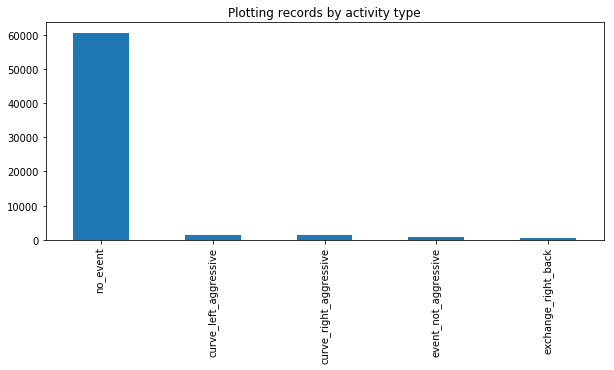

In [82]:
df['Event'].value_counts().plot(kind='bar', title='Plotting records by activity type', figsize=(10, 4),align='center');

### Generating a new feature to simplify acc/gyro graphical signal analysis : magnitude
magnitude(t)=sqrt(t.x^2 + t.y^2 + t.z^2)

In [83]:
def magnitude(df):
    ax2 = df['Ax']**2
    ay2 = df['Ay']**2
    az2 = df['Az']**2
    am2 = ax2 + ay2 + az2
    
    gx2 = df['Gx']**2
    gy2 = df['Gy']**2
    gz2 = df['Gz']**2
    gm2 = gx2 + gy2 + gz2
    
    df['Am']=am2.apply(lambda x: math.sqrt(x))
    df['Gm']=gm2.apply(lambda x: math.sqrt(x))

### Applying magnitude on dataset

In [84]:
magnitude(df)

In [85]:
df.head()

,timestamp,Ax,Ay,Az,Gx,Gy,Gz,Event,Am,Gm
0,14/05/2016 10:54:33,-0.161602,0.120174,9.596758,-0.070372,0.000844,0.029619,no_event,9.598871,0.076356
1,14/05/2016 10:54:33,-0.122628,0.315638,9.425655,-0.058695,0.009130,0.024406,no_event,9.431736,0.064219
2,14/05/2016 10:54:33,-0.178777,0.330180,9.445955,0.006625,-0.002283,-0.015018,no_event,9.453415,0.016572
3,14/05/2016 10:54:33,0.016043,0.038759,9.528445,0.064933,0.033172,-0.040503,no_event,9.528538,0.083409
4,14/05/2016 10:54:33,0.141716,-0.162492,9.756854,0.039454,-0.013078,-0.007681,no_event,9.759236,0.042269


### Plotting utilities

In [93]:
def plot_activity(Event, df,i=1000):
    data = df[df['Event'] == Event][['Ax', 'Ay', 'Az', 'Gx', 'Gy', 'Gz']][:i]
    axis = data.plot(subplots=True, figsize=(16, 6), 
                     title=Event)
    for ax in axis:
        ax.legend(loc='lower left', bbox_to_anchor=(1.0, 0.5))
        
def plot_activity_magnitude(Event, df,i=1000):
    data = df[df['Event'] == Event][['Am', 'Gm']][:i]
    axis = data.plot(subplots=True, figsize=(12, 4), 
                     title=Event)
    for ax in axis:
        ax.legend(loc='lower left', bbox_to_anchor=(1.0, 0.5))
        
def plot_datasets(df,i=1000):
    plot_activity("no_event", df,i)
    plot_activity("event_not_aggressive", df,i)
    plot_activity("curve_right_aggressive", df,i)
    plot_activity("curve_left_aggressive", df,i)
    plot_activity("exchange_right_back", df,i)

def plot_datasets_magnitude(df,i=1000):
    plot_activity_magnitude("no_event", df,i)
    plot_activity_magnitude("event_not_aggressive", df,i)
    plot_activity_magnitude("curve_right_aggressive", df,i)
    plot_activity_magnitude("curve_left_aggressive", df,i)
    plot_activity_magnitude("exchange_right_back", df,i)
    

### plotting dataset without magnitude

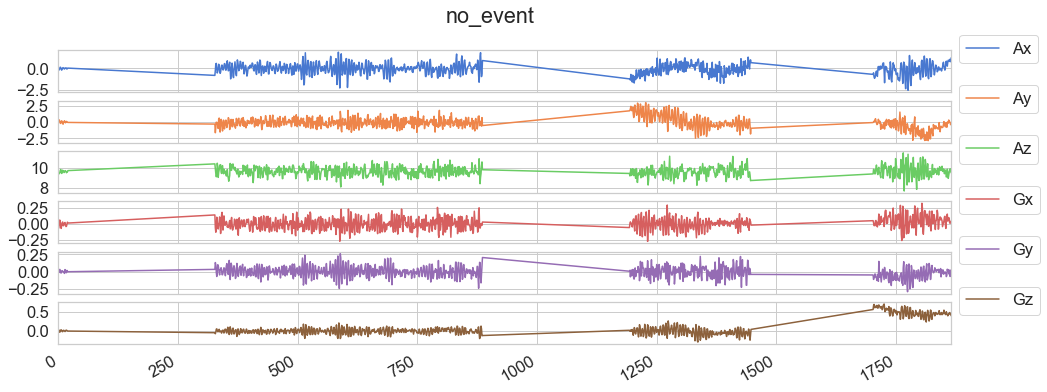

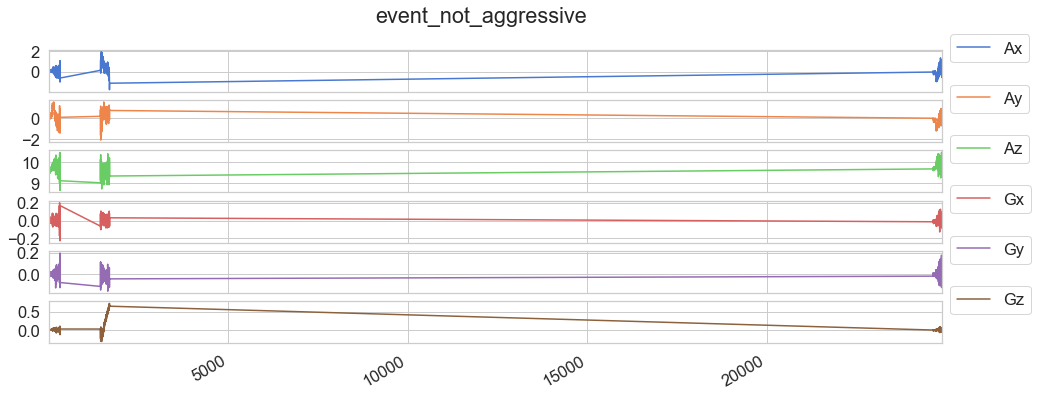

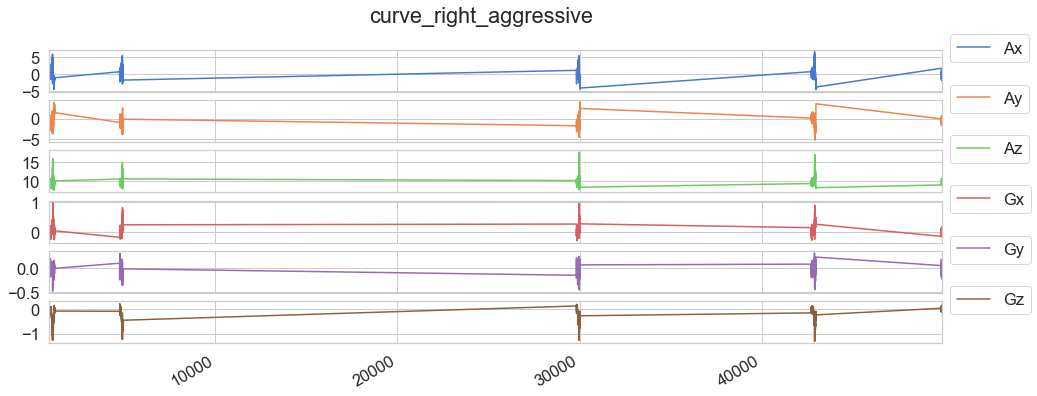

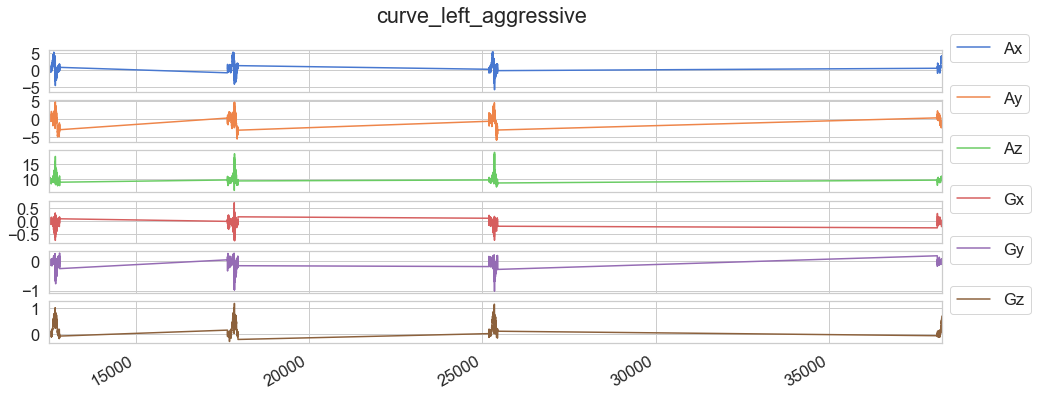

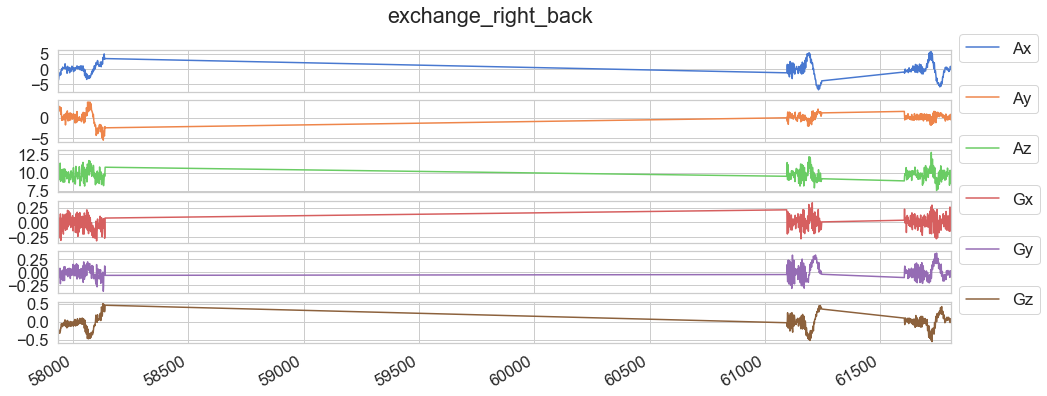

In [100]:
plot_datasets(df)

### plotting magnitudes

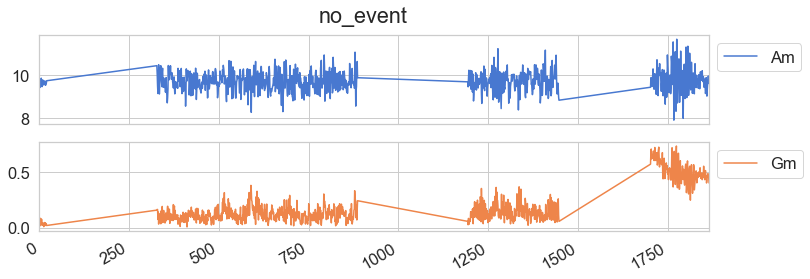

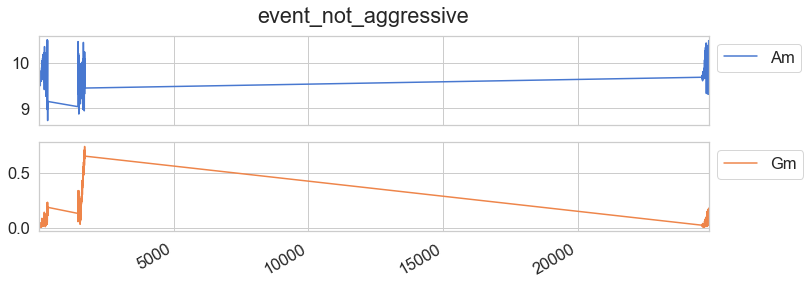

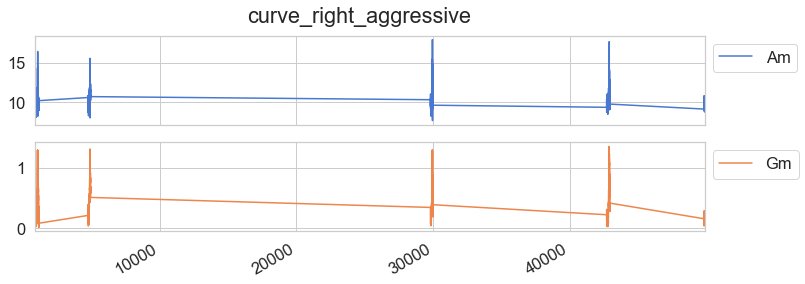

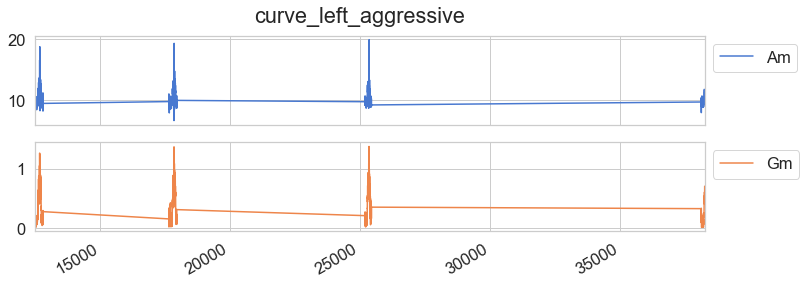

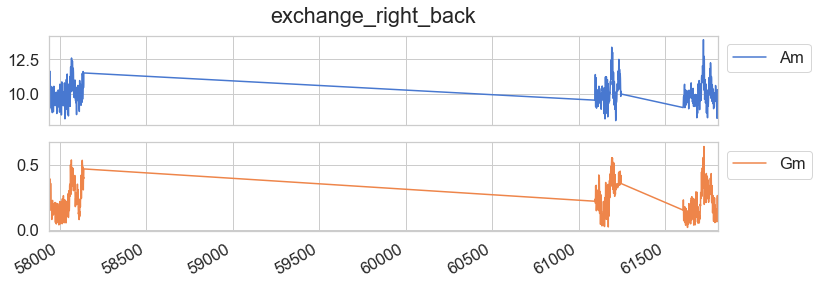

In [102]:
plot_datasets_magnitude(df)